# CS765 PROJECT - EXPERIMENT

## The Experiment is based on Axelrod's first and second tournament<br>
Axelrod, R. (1980). Effective Choice in the Prisoner’s Dilemma. The Journal of Conflict Resolution, 24(1), 3–25. https://doi.org/10.1177/002200278002400101 <br>
Axelrod, R. (1980). More Effective Choice in the Prisoner’s Dilemma. The Journal of Conflict Resolution, 24(3), 379–403. https://doi.org/10.1177/002200278002400301


### Tournament Configuration <br>

##### Configuration taken from: <br>
Harper, M., Knight, V., Jones, M., Koutsovoulos, G., Glynatsi, N. E., & Campbell, O. (2017). Reinforcement Learning Produces Dominant Strategies for the Iterated Prisoner's Dilemma. Cornell University Library, arXiv.org. https://doi.org/10.1371/journal.pone.0188046

In [1]:
# libraries used
import axelrod as axl
import matplotlib.pyplot as plt
import truth as tr
import axelrod_dojo as dojo
from operator import itemgetter
import pprint

# we set up seed for the results to be reproducible
seed = 42


### Player Selection For Training and Tournament

<br>According to Axelrods 1st tournament paper scores should be ionterpreted as following: score<=200 - bad performance, 200< score <= 600 - we expect most of the scores to be in this range, scores above 600 should be above average and rarely attained maximum possible is 1000 <br>

1. <p>Player 1: TitForTat</p><p>This strategy was referred to as the ‘simplest’ strategy submitted to Axelrod’s first tournament. It came first in both first and second tournament. Intially proposed by Anatol Rapoport.</p>

2. <p>Player 2: Defector</p><p>Defector is a simple player that plays Defect on every move. Therefore anytime we try to cooperate it will win, if we detect that it is playing againt us and punish it's behaviour we deflect this player as well, minimizing our chances of having good score. Best score achievable is 200 against this opponent, worst is 0. It will perform best against player 3, which always cooperates - gaining 1000 points.</p>

3. <p>Player 3: Cooperator</p><p>Opposite of Defector - always Cooperates</p>

4. <p>Player 4: Grudger</p><p>A player starts by cooperating however will defect if at any point the opponent has defected. This strategy came 7th in Axelrod’s original tournament.</p>

5. <p>Player 5: Second by Danny Champion </p> <p>Strategy submitted to Axelrod’s second tournament by Danny Champion.<br>This player cooperates on the first 10 moves and plays Tit for Tat for the next 15 more moves. After 25 moves, the program cooperates unless all the following are true: the other player defected on the previous move, the other player cooperated less than 60% and the random number between 0 and 1 is greater that the other player’s cooperation rate.</p>

6. <p>Player 6: Tranquilizer</p><p>Submitted to Axelrod’s second tournament by Craig Feathers<br>Description given in Axelrod’s “More Effective Choice in the Prisoner’s Dilemma” paper: The rule normally cooperates but is ready to defect if the other player defects too often. Thus the rule tends to cooperate for the first dozen or two moves if the other player is cooperating, but then it throws in a defection. If the other player continues to cooperate, then defections become more frequent. But as long as Tranquilizer is maintaining an average payoff of at least 2.25 points per move, it will never defect twice in succession and it will not defect more than one-quarter of the time.</p>

7. <p>Player 7: Second by Otto Borufsen</p><p>Strategy submitted to Axelrod’s second tournament by Otto Borufsen (K32R), and came in third in that tournament.</p><p>This player keeps track of the the opponent’s responses to own behavior:</p><p>
    - cd_count counts: Opponent cooperates as response to player defecting.<br>
    - cc_count counts: Opponent cooperates as response to player cooperating.</p>
    <p>The player has a defect mode and a normal mode. In defect mode, the player will always defect. In normal mode, the player obeys the following ranked rules:</p>
      1. If in the last three turns, both the player/opponent defected, then cooperate for a single turn.<br>
      2. If in the last three turns, the player/opponent acted differently from each other and they’re alternating, then change next defect to cooperate. (Doesn’t block third rule.)<br>
      3. Otherwise, do tit-for-tat.<br><p>Start in normal mode, but every 25 turns starting with the 27th turn, re-evaluate the mode. Enter defect mode if any of the following conditions hold:
  - Detected random: Opponent cooperated 7-18 times since last mode evaluation (or start) AND less than 70% of opponent cooperation was in response to player’s cooperation, i.e. cc_count / (cc_count+cd_count) < 0.7
  - Detect defective: Opponent cooperated fewer than 3 times since last mode evaluation.</p><p>When switching to defect mode, defect immediately. The first two rules for normal mode require that last three turns were in normal mode. When starting normal mode from defect mode, defect on first move.</p>
  
8. <p>Player 8: Threshold Startegy - Trust (ours)</p><p>****about player ****</p>

9. <p>Player 9: Evolved FSM [size of FSM]</p><p>Works as described in Harper, M., Knight, V., Jones, M., Koutsovoulos, G., Glynatsi, N. E., & Campbell, O. (2017). Reinforcement Learning Produces Dominant Strategies for the Iterated Prisoner's Dilemma. Cornell University Library, arXiv.org. https://doi.org/10.1371/journal.pone.0188046<br>We will try and train it in different sizes and compare if larger (more complex) strategies are able to compete better.</p>

10. <p>Player 10: RANDOM</p>Axelrod included player that plays randomly Cooperate of Defect in his tournaments, we include it as well to assess how the strategies perform against a completely random startegy<br>

In [2]:
t4t = axl.TitForTat()
a_d = axl.Defector()
a_c = axl.Cooperator()
gru = axl.Grudger()
sbc = axl.SecondByChampion()
trq = axl.SecondByTranquilizer()
sbb = axl.SecondByBorufsen()
tru = tr.Truth()
# fsm = [] 
rnd = axl.Random()

players = [t4t, a_d, a_c, gru, sbc, trq, sbb, tru, rnd]

## Evolved FSM

In [3]:
def generate_FSM_Players(size, opponents):
    objective = dojo.prepare_objective(name="score", turns=100, repetitions=20)
    params_class = axl.EvolvableFSMPlayer
    params_kwargs = {"num_states": size, "seed":seed}

    population = dojo.Population(player_class=params_class,
                                params_kwargs=params_kwargs,
                                size=40,
                                objective=objective,
                                output_filename="training_output_fsm{}.csv".format(size),
                                opponents=opponents,
                                mutation_probability=.10,
                                processes=0
                            )
    # Run the GE for FSM
    generations = 20
    population.run(generations)
    return population.population[0]
    



In [4]:
# approx 45min
opponents = players
fsm_3 = generate_FSM_Players(3,opponents)
fsm_5 = generate_FSM_Players(5, opponents)
fsm_10 = generate_FSM_Players(10, opponents)
fsm_20 = generate_FSM_Players(20, opponents)
fsm_40 = generate_FSM_Players(40, opponents)
fsm_80 = generate_FSM_Players(80, opponents)




Scoring Generation 1
Generation 1 | Best Score: 2.3401666666666667
Scoring Generation 2
Generation 2 | Best Score: 2.684333333333333
Scoring Generation 3
Generation 3 | Best Score: 2.6892777777777774
Scoring Generation 4
Generation 4 | Best Score: 2.692055555555555
Scoring Generation 5
Generation 5 | Best Score: 2.690222222222222
Scoring Generation 6
Generation 6 | Best Score: 2.690777777777778
Scoring Generation 7
Generation 7 | Best Score: 2.6919999999999997
Scoring Generation 8
Generation 8 | Best Score: 2.6899444444444445
Scoring Generation 9
Generation 9 | Best Score: 2.690388888888889
Scoring Generation 10
Generation 10 | Best Score: 2.6924444444444444
Scoring Generation 11
Generation 11 | Best Score: 2.6950555555555553
Scoring Generation 12
Generation 12 | Best Score: 2.6924444444444444
Scoring Generation 13
Generation 13 | Best Score: 2.6906666666666665
Scoring Generation 14
Generation 14 | Best Score: 2.690722222222222
Scoring Generation 15
Generation 15 | Best Score: 2.690277

In [5]:
# append EvolveFSM generated players to players list for topurnament
players += [fsm_3, fsm_5, fsm_10, fsm_20, fsm_40, fsm_80]
players

[Tit For Tat,
 Defector,
 Cooperator,
 Grudger,
 Second by Champion,
 Second by Tranquilizer,
 Second by Borufsen,
 Truth: C,
 Random: 0.5,
 EvolvableFSMPlayer: ((0, C, 2, C), (0, D, 2, D), (1, C, 2, C), (1, D, 0, C), (2, C, 2, C), (2, D, 2, D)), 2, C, 3, 0.1, 1281475256,
 EvolvableFSMPlayer: ((0, C, 4, C), (0, D, 1, D), (1, C, 2, D), (1, D, 4, D), (2, C, 2, C), (2, D, 4, D), (3, C, 3, D), (3, D, 2, C), (4, C, 3, C), (4, D, 1, D)), 3, C, 5, 0.1, 1521038932,
 EvolvableFSMPlayer: ((0, C, 6, C), (0, D, 7, D), (1, C, 9, D), (1, D, 8, C), (2, C, 5, C), (2, D, 1, C), (3, C, 4, C), (3, D, 6, D), (4, C, 4, C), (4, D, 9, D), (5, C, 5, D), (5, D, 4, C), (6, C, 6, D), (6, D, 7, C), (7, C, 9, D), (7, D, 2, D), (8, C, 6, D), (8, D, 8, D), (9, C, 3, D), (9, D, 7, C)), 8, C, 10, 0.1, 780766283,
 EvolvableFSMPlayer: ((0, C, 6, C), (0, D, 14, C), (1, C, 7, D), (1, D, 6, C), (2, C, 18, C), (2, D, 10, C), (3, C, 3, D), (3, D, 2, C), (4, C, 5, C), (4, D, 0, C), (5, C, 5, D), (5, D, 0, C), (6, C, 11, D), (

## Our Tournament

In [6]:
#size of tournament (#1000 rounds and #200 turns = approx 20min runtime)
n_rounds = 1000
n_turns = 200

tournament = axl.Tournament(players, turns=n_turns, repetitions=n_rounds, seed=seed)  # Create a tournament
results = tournament.play(processes=0)

Analysing: 100%|██████████| 25/25 [00:03<00:00,  6.48it/s]


In [7]:
## correct names on FSM Ranked List
for i in range(len(results.ranked_names)):
    if results.ranked_names[i].find('EvolvableFSMPlayer') >= 0:
        results.ranked_names[i] = results.ranked_names[i].split(':')[0] + '_' \
                                + results.ranked_names[i].split('))')[1].split(',')[3].strip()
results.ranked_names

['EvolvableFSMPlayer_10',
 'Second by Borufsen',
 'EvolvableFSMPlayer_3',
 'Tit For Tat',
 'EvolvableFSMPlayer_5',
 'EvolvableFSMPlayer_80',
 'EvolvableFSMPlayer_40',
 'EvolvableFSMPlayer_20',
 'Second by Tranquilizer',
 'Second by Champion',
 'Random: 0.5',
 'Grudger',
 'Defector',
 'Cooperator',
 'Truth: C']

In [8]:
plot = axl.Plot(results)

In [9]:
## Correct names on plots

for i in range(len(plot.players)):
    if plot.players[i].find('EvolvableFSMPlayer')>=0:
        plot.players[i] = plot.players[i].split(':')[0] + '_' \
                        + plot.players[i].split('))')[1].split(',')[3].strip()
plot.players

['Tit For Tat',
 'Defector',
 'Cooperator',
 'Grudger',
 'Second by Champion',
 'Second by Tranquilizer',
 'Second by Borufsen',
 'Truth: C',
 'Random: 0.5',
 'EvolvableFSMPlayer_3',
 'EvolvableFSMPlayer_5',
 'EvolvableFSMPlayer_10',
 'EvolvableFSMPlayer_20',
 'EvolvableFSMPlayer_40',
 'EvolvableFSMPlayer_80']

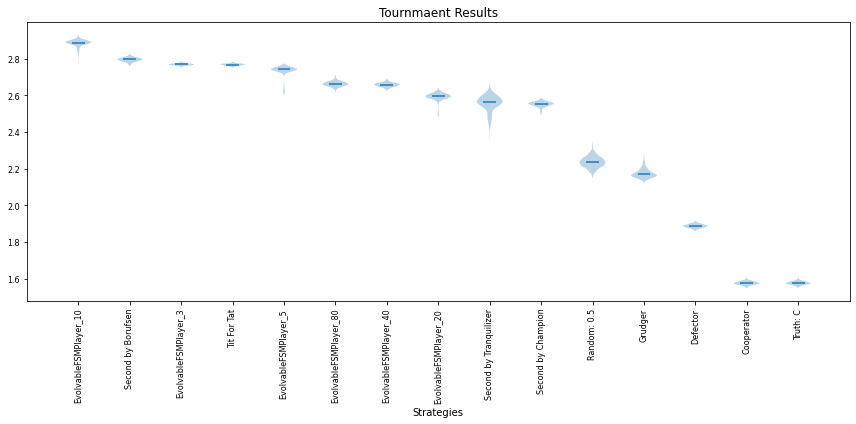

In [10]:
# set up plot labels
_, ax = plt.subplots()
ax.set_title('Tournmaent Results')
ax.set_xlabel('Strategies')
# draw the plot
p = plot.boxplot(ax=ax)

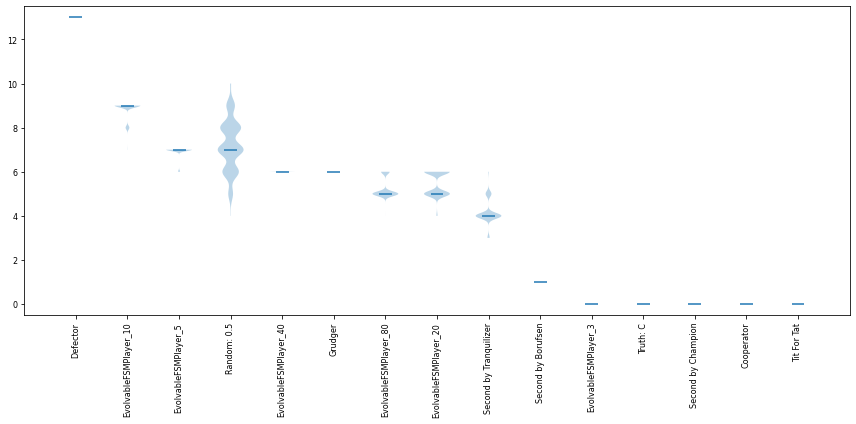

In [11]:
# Visualising the distributions of wins
p = plot.winplot()

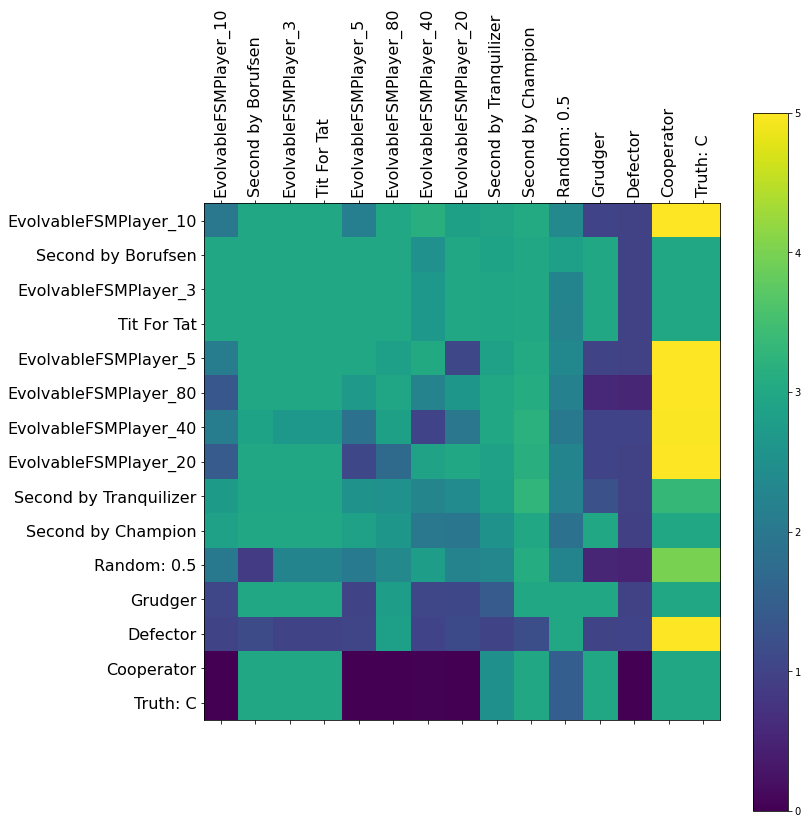

In [12]:
# Visualising the payoff matrix
p = plot.payoff()

In [13]:
summary = results.summarise()
summary

[Player(Rank=0, Name='EvolvableFSMPlayer_10', Median_score=2.888214285714286, Cooperation_rating=0.4840203571428571, Wins=9.0, Initial_C_rate=1.0, CC_rate=0.4083660714285714, CD_rate=0.07565428571428572, DC_rate=0.2858210714285714, DD_rate=0.23015857142857143, CC_to_C_rate=0.8997163110708227, CD_to_C_rate=0.34824606607933845, DC_to_C_rate=0.37030614991559385, DD_to_C_rate=0.751261985621912),
 Player(Rank=1, Name='Second by Borufsen', Median_score=2.795714285714286, Cooperation_rating=0.8412896428571428, Wins=1.0, Initial_C_rate=1.0, CC_rate=0.8042707142857143, CD_rate=0.03701892857142857, DC_rate=0.055845, DD_rate=0.10286535714285712, CC_to_C_rate=0.9975288816285848, CD_to_C_rate=0.17662736587039266, DC_to_C_rate=0.8704713121720703, DD_to_C_rate=0.021954042457091236),
 Player(Rank=2, Name='EvolvableFSMPlayer_3', Median_score=2.768571428571429, Cooperation_rating=0.8606571428571429, Wins=0.0, Initial_C_rate=1.0, CC_rate=0.81121, CD_rate=0.04944714285714286, DC_rate=0.048881428571428576,

In [14]:
# Axelrod’s Ecological Variant
eco = axl.Ecosystem(results)
eco.reproduce(100)

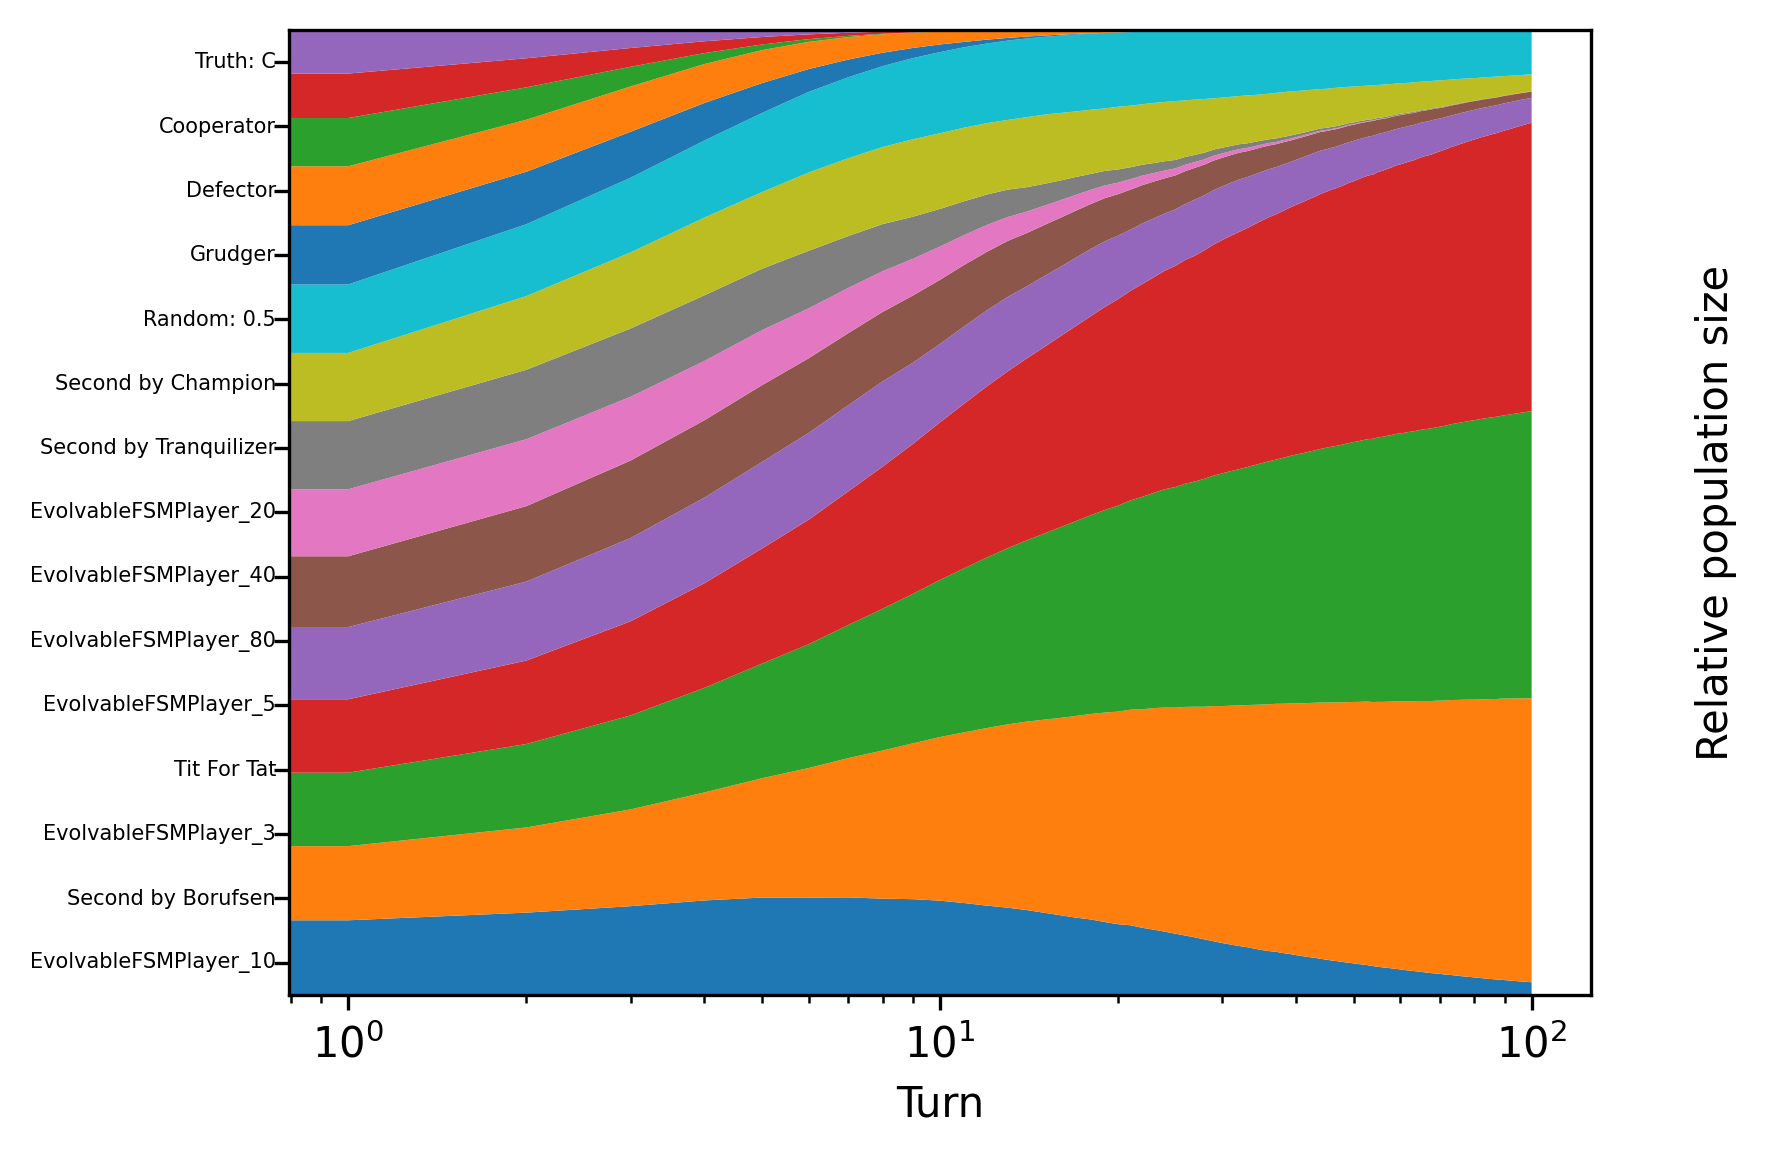

In [15]:
eco_plot = axl.Plot(results)
eco_p = eco_plot.stackplot(eco, logscale=True)
eco_p.set_dpi(300)

In [16]:
import pprint

In [17]:
# This gives the score difference for each player against each opponent for every repetition:
#pprint.pprint(results.score_diffs, compact=True) 


# This gives the mean payoff differences over each repetition:
pprint.pprint(results.payoff_diffs_means, compact=True)  


[[0.0, -0.025000000000000005, 0.0, 0.0, 0.0, -0.0013, 0.0, 0.0, -0.013175, 0.0,
  0.0, 0.0, 0.0, 0.0, 0.0],
 [0.025000000000000005, 0.0, 5.0, 0.025000000000000005, 0.25,
  0.025000000000000005, 0.17499999999999996, 5.0, 2.5068, 0.025000000000000005,
  0.05000000000000001, 0.025000000000000005, 0.14999999999999994, 0.0,
  2.274999999999999],
 [0.0, -5.0, 0.0, 0.0, 0.0, -0.823125, 0.0, 0.0, -2.50055, 0.0, -4.975, -4.975,
  -5.0, -4.950000000000002, -5.0],
 [0.0, -0.025000000000000005, 0.0, 0.0, 0.0, 0.19875, 0.0, 0.0, 2.457675, 0.0,
  0.0, 0.05000000000000001, 0.07499999999999997, 0.05000000000000001,
  2.225000000000001],
 [0.0, -0.25, 0.0, 0.0, 0.0, -0.72245, 0.0, 0.0, -1.2249499999999998, 0.0,
  -0.20000000000000004, -0.20000000000000004, -1.1870999999999998,
  -1.1987249999999998, -0.44522500000000004],
 [0.0013, -0.025000000000000005, 0.823125, -0.19875, 0.72245, 0.0, 0.073875,
  0.8228249999999999, -0.10169999999999998, 0.0017749999999999999, -0.2751,
  -0.19265, -0.436225000000000

In [18]:
#Morality Metrics - info https://axelrod.readthedocs.io/en/stable/how-to/calculate_morality_metrics.html#morality-metrics
results.cooperating_rating  
pprint.pprint(results.vengeful_cooperation, compact=True)
print('_____________________________________________') 
pprint.pprint(results.good_partner_matrix, compact=True)
print('_____________________________________________') 
pprint.pprint(results.good_partner_rating, compact=True)
print('_____________________________________________') 
print(results.eigenmoses_rating)
print('_____________________________________________') 
print(results.eigenjesus_rating)

[[1.0, -0.99, 1.0, 1.0, 1.0, 0.8804799999999999, 1.0, 1.0, 0.002569999999999961,
  1.0, 0.97, 0.97, 0.97, 0.3400000000000001, 0.95],
 [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,
  -1.0, -1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, -0.99, 1.0, 1.0, 1.0, -0.71999, 1.0, 1.0, -0.98045, 1.0, -0.98, -0.98,
  -0.99, -0.99, -0.99],
 [1.0, -0.9, 1.0, 1.0, 1.0, 0.99041, 1.0, 1.0, 0.48771999999999993, 1.0, 0.97,
  0.97, 0.6048899999999999, 0.65012, 0.8678300000000001],
 [0.8799600000000001, -0.99, 0.67075, -0.64049, 0.70143, 0.71339, 0.84442,
  0.6708700000000001, 0.040019999999999945, 0.8814599999999999,
  0.6831100000000001, 0.7874000000000001, 0.5916999999999999,
  0.5913299999999999, 0.71279],
 [1.0, -0.9299999999999999, 1.0, 1.0, 1.0, 0.8739699999999999, 1.0, 1.0,
  -0.77786, 1.0, 0.97, 0.97, 0.97, 0.53, 0.95],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [-0.002700000000000035